### import libraries

In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

### define functions

In [8]:
def show_hist(img, ylim=[0, 2500]):
    '''
    shows the original image and the histogram of the image side by side
    '''
    no_of_pixels = img.shape[0]*img.shape[1]
    plt.rcParams["figure.figsize"] = (10,7)
    plt.subplot(1,2,1)
    plt.imshow(img,cmap='gray')
    plt.title('image')
    plt.xticks([])
    plt.yticks([])

    plt.subplot(1,2,2)
    hist,bin = np.histogram(img.ravel(),256,[0,255])
    plt.xlim([-10,300])
    plt.ylim(ylim)
    plt.hist(img.ravel(), bins=256, rwidth=0.8)
    plt.title('histogram')

    plt.show()

def apply_threshold(img, threshold):
    '''
    applies the given threshold to the image
    if the pixel value is greater than the threshold, 
        the value is set to max (255)
    else if the pixel value is less than the threshold
        the value is set to 0
    '''
    img_thres = img.copy()
    img_thres[np.where(img_thres < threshold)] = 0
    img_thres[np.where(img_thres > threshold)] = 255
    return img_thres    

def show(img):
    '''
    shows gray image
    '''
    plt.imshow(img, cmap='gray')
    plt.show()

def show_sidebyside(img_list, title_list=None):
    '''
    displays all the images in the list side by side
    Args:
        img_list (list): list of images
    '''
    plt.rcParams["figure.figsize"] = (10,7)
    # plt.figure()
    f, ax = plt.subplots(1,len(img_list)) 
    for i, img in enumerate(img_list):
        if title_list is not None:
            ax[i].set_title(title_list[i])
        ax[i].imshow(img, cmap = plt.get_cmap('gray'))

    plt.show() 

### Simple Thresholding Based Image Binarization Algorithm

#### Image 1

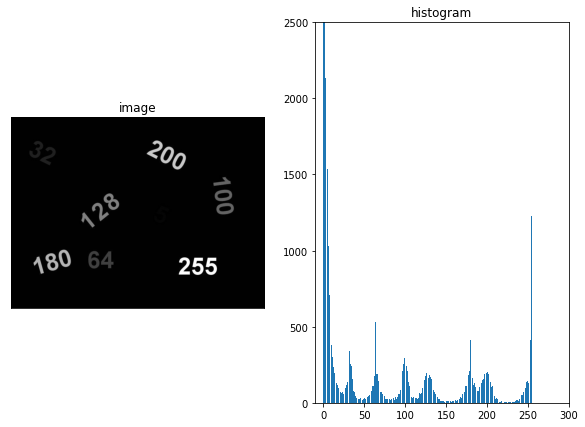

In [9]:
img_path = 'images/img1.jpg'
# read the image
img = cv2.imread(img_path,0)
# create histogram
hist,bin = np.histogram(img.ravel(),256,[0,255])
show_hist(img)

we can see that we can choose multiple threshold values and get different results
potential threshold values are: 25, 50, 75, 110, 155, 225

=================================== Threshold = 25 ===================================


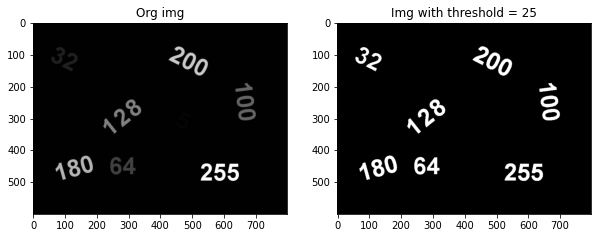

=================================== Threshold = 50 ===================================


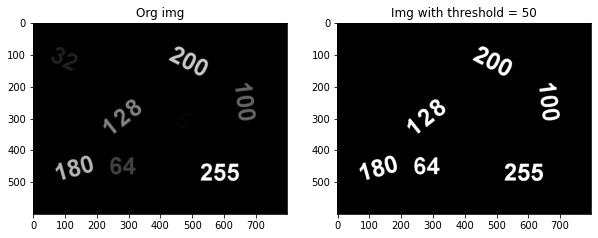

=================================== Threshold = 75 ===================================


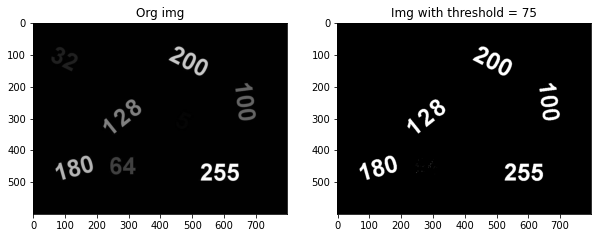

=================================== Threshold = 110 ===================================


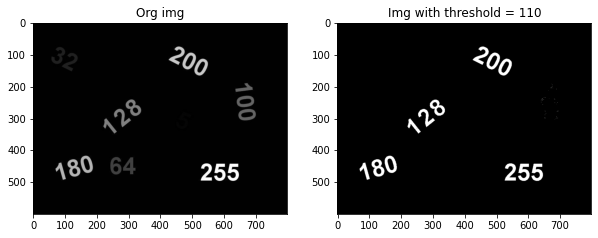

=================================== Threshold = 155 ===================================


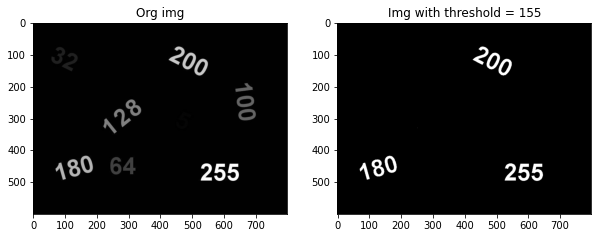

=================================== Threshold = 225 ===================================


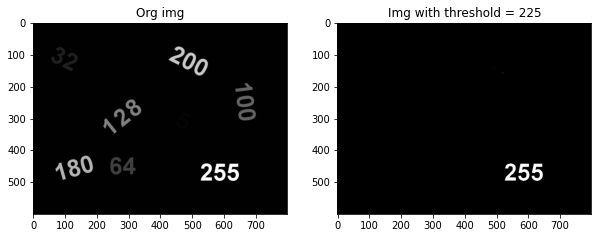

In [65]:
thresholds = [25, 50, 75, 110, 155, 225]

for threshold in thresholds:
    print(('='*35)+' Threshold = {} '.format(threshold)+('='*35))
    img_new = apply_threshold(img, threshold)
    show_sidebyside([img, img_new], title_list=['Org img', 'Img with threshold = {}'.format(threshold)])

#### Image 2

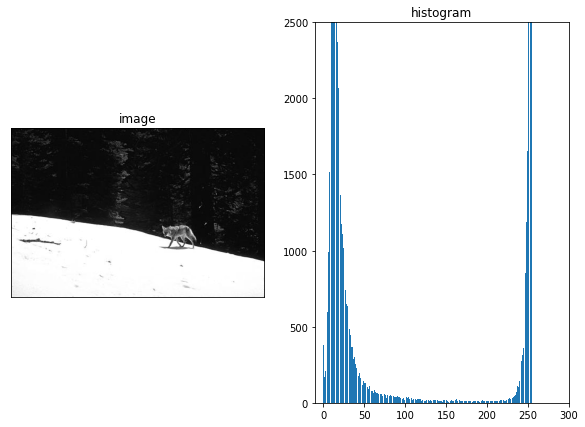

In [10]:
img_path = 'images/img2.jpg'
# read the image
img = cv2.imread(img_path,0)
# create histogram
hist,bin = np.histogram(img.ravel(),256,[0,255])
show_hist(img)

The clear threshold seems to be around 150

=================================== Threshold = 75 ===================================


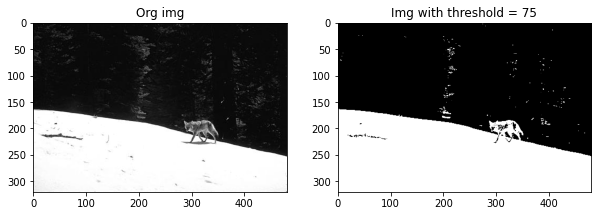

=================================== Threshold = 150 ===================================


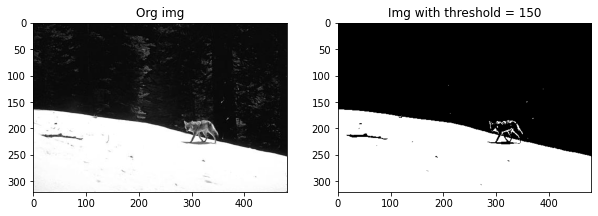

=================================== Threshold = 225 ===================================


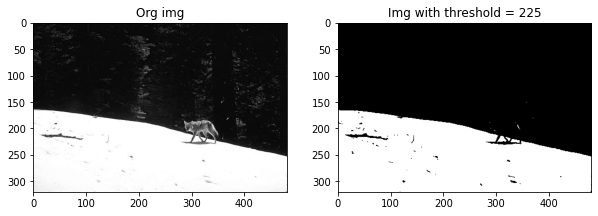

In [58]:
thresholds = [75, 150, 225]

for threshold in thresholds:
    print(('='*35)+' Threshold = {} '.format(threshold)+('='*35))
    img_new = apply_threshold(img, threshold)
    show_sidebyside([img, img_new], title_list=['Org img', 'Img with threshold = {}'.format(threshold)])

#### Image 3

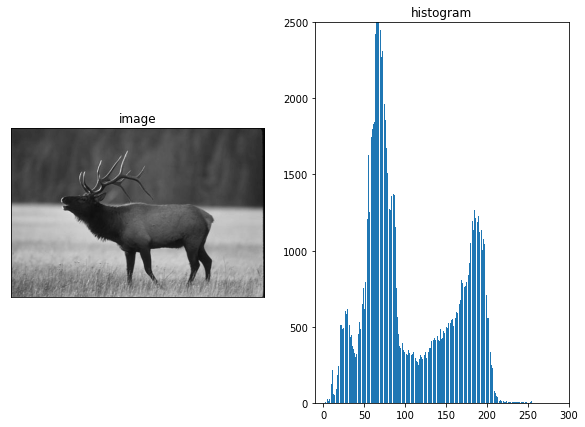

In [11]:
img_path = 'images/img3.jpg'
# read the image
img = cv2.imread(img_path,0)
# create histogram
hist,bin = np.histogram(img.ravel(),256,[0,255])
show_hist(img)

A good threshold seem to be around 120

=================================== Threshold = 45 ===================================


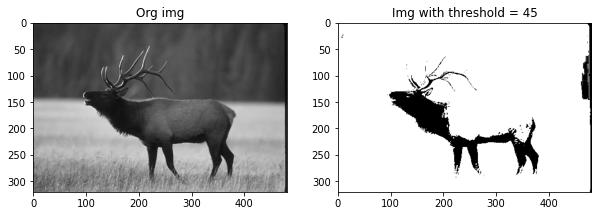

=================================== Threshold = 120 ===================================


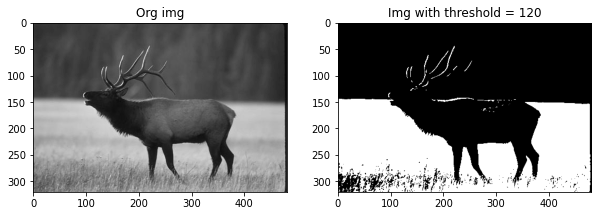

=================================== Threshold = 150 ===================================


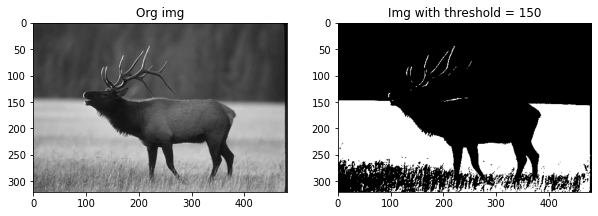

=================================== Threshold = 225 ===================================


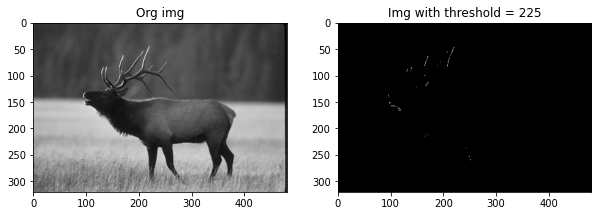

In [60]:
thresholds = [45, 120, 150, 225]

for threshold in thresholds:
    print(('='*35)+' Threshold = {} '.format(threshold)+('='*35))
    img_new = apply_threshold(img, threshold)
    show_sidebyside([img, img_new], title_list=['Org img', 'Img with threshold = {}'.format(threshold)])

## Otsu thresholding

In [62]:
def otsu(img):
    '''
    returns the threshold value calculated by otsu algorithm
    '''
    no_of_pixels = img.shape[0] * img.shape[1]

    # step 1: compute histograms H1 for u = 0 ... Gmax
    his, bins = np.histogram(img, np.arange(257)) 
    final_thresh = -1
    final_variance = -1
    intensity_arr = np.arange(256)

    # step 2: let t be the increment for potential thresholds 
    for t in bins[1:-1]: 
        # step 3: compute the probabilities
        P1 = np.sum(his[:t]) / no_of_pixels
        P2 = np.sum(his[t:]) / no_of_pixels
        
        # step 4: compute class means
        mu1 = np.sum(intensity_arr[:t]*his[:t]) / float(P1)
        mu2 = np.sum(intensity_arr[t:]*his[t:]) / float(P2)

        # step 5: compute the between-class variance
        BC_variance = P1 * P2 * (mu1 - mu2) ** 2 

        # step 6: check if this bin has the highest between-class variance so far
        if BC_variance > final_variance:
            final_thresh = t
            final_variance = BC_variance

    return final_thresh

======================================== Image 1 ========================================


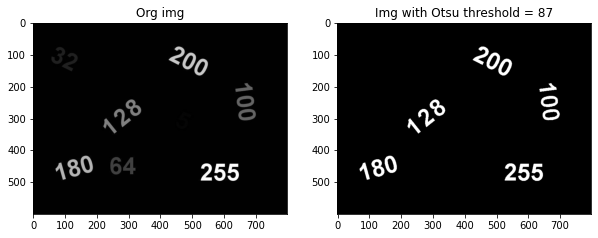

======================================== Image 2 ========================================


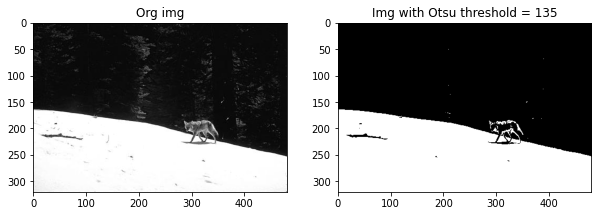

======================================== Image 3 ========================================


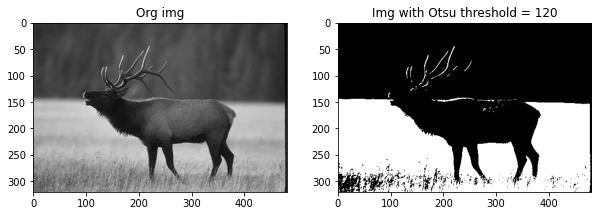

======================================== Image 4 ========================================


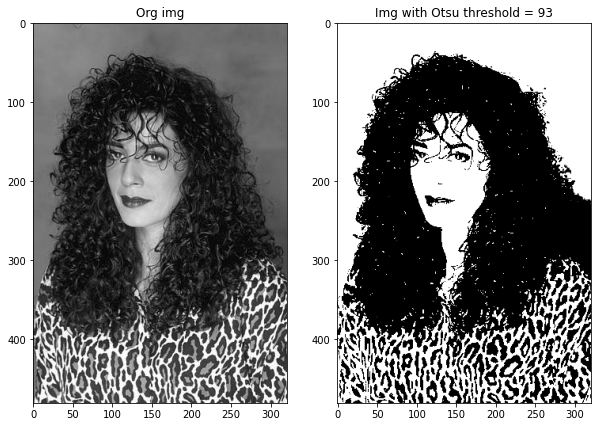

In [66]:
img_path = 'images/img1.jpg'
for i in range(1, 5):
    img_path = 'images/img{}.jpg'.format(i)
    # read the image
    img = cv2.imread(img_path,0)
    # compute the otsu threshold
    otsu_threshold = otsu(img)
    # print('Otsu threshold = {}'.format(otsu_threshold))
    # apply otsu threshold to the image
    print(('='*40)+' Image {} '.format(i)+('='*40))
    img_new = apply_threshold(img, otsu_threshold)
    show_sidebyside([img, img_new], title_list=['Org img', 'Img with Otsu threshold = {}'.format(otsu_threshold)])


fin.